In [4]:
import os
if os.getcwd().split("/")[-1] != 'BENDR-XAI': os.chdir("../")

import mne
import numpy as np
import matplotlib.pyplot as plt

## Test

In [47]:
# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#          Joan Massich <mailsik@gmail.com>
#          Eric Larson <larson.eric.d@gmail.com>
#
# License: BSD-3-Clause

import os.path as op
import numpy as np

import mne
from mne.datasets import eegbci
from mne.datasets import fetch_fsaverage

# Download fsaverage files
fs_dir = fetch_fsaverage(verbose=True)
subjects_dir = op.dirname(fs_dir)

# The files live in:
subject = 'fsaverage'
trans = 'fsaverage'  # MNE has a built-in fsaverage transformation
src = op.join(fs_dir, 'bem', 'fsaverage-ico-5-src.fif')
bem = op.join(fs_dir, 'bem', 'fsaverage-5120-5120-5120-bem-sol.fif')

0 files missing from root.txt in /home/andersgm/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /home/andersgm/mne_data/MNE-fsaverage-data/fsaverage


In [48]:
FILE = 'notebooks/S001R10.edf'

raw = mne.io.read_raw_edf(FILE, verbose=False, preload=True)
mne.datasets.eegbci.standardize(raw)  # set channel names
montage = mne.channels.make_standard_montage('standard_1020')
raw = raw.set_montage(montage); # set montage
raw = raw.set_eeg_reference(projection=True, verbose = False)

In [50]:
fwd = mne.make_forward_solution(raw.info, trans=trans, src=src, bem=bem,  meg=False, eeg=True, verbose=False)
#fwd = mne.convert_forward_solution(fwd, force_fixed=True, verbose=False)

In [51]:
tmin = 0
tmax = 10
imin = int(0 * raw.info['sfreq'])
imax = int(10 * raw.info['sfreq'])

cov = mne.compute_raw_covariance(raw, verbose=False, tmin=tmin, tmax=tmax)

In [86]:
snr = 1.0  # use smaller SNR for raw data
lambda2 = 1.0 / snr ** 2
method = "sLORETA"

In [87]:
inv = mne.minimum_norm.make_inverse_operator(
    raw.info, fwd, cov, verbose=True)

stc = mne.minimum_norm.apply_inverse_raw(raw, inv, lambda2, method=method, start=imin, stop=imax)

Converting forward solution to surface orientation
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 64 channels.
    64 out of 64 channels remain after picking
Selected 64 channels
Creating the depth weighting matrix...
    64 EEG channels
    limit = 20485/20484 = 2.174517
    scale = 125525 exp = 0.8
Applying loose dipole orientations to surface source spaces: 0.2
Whitening the forward solution.
    Created an SSP operator (subspace dimension = 1)
Computing rank from covariance with rank=None
    Using tolerance 3.2e-12 (2.2e-16 eps * 64 dim * 2.3e+02  max singular value)
    Estimated rank (eeg): 63
    EEG: rank 63 computed from 64 data channels with 1 projector
    Setting small EEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing SVD

In [76]:
stc.plot()

Using control points [1.57144407 1.72600898 2.92068693]


In [89]:
tmp = mne.apply_forward_raw(fwd, stc, raw.info)

    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Changing to fixed-orientation forward solution with surface-based source orientations...
    [done]
Projecting source estimate to sensor space...


/tmp/ipykernel_887/3298040505.py:1: RuntimeWarning: Source estimate only contains currents with positive values. Use pick_ori="normal" when computing the inverse to compute currents not current magnitudes.
  tmp = mne.apply_forward_raw(fwd, stc, raw.info)
/tmp/ipykernel_887/3298040505.py:1: RuntimeWarning: The maximum current magnitude is 6366807362.8 nAm, which is very large. Are you trying to apply the forward model to noise-normalized (dSPM, sLORETA, or eLORETA) values? The result will only be correct if currents (in units of Am) are used.
  tmp = mne.apply_forward_raw(fwd, stc, raw.info)


[done]
Creating RawArray with float64 data, n_channels=64, n_times=1600
    Range : 0 ... 1599 =      0.000 ...     9.994 secs
Ready.


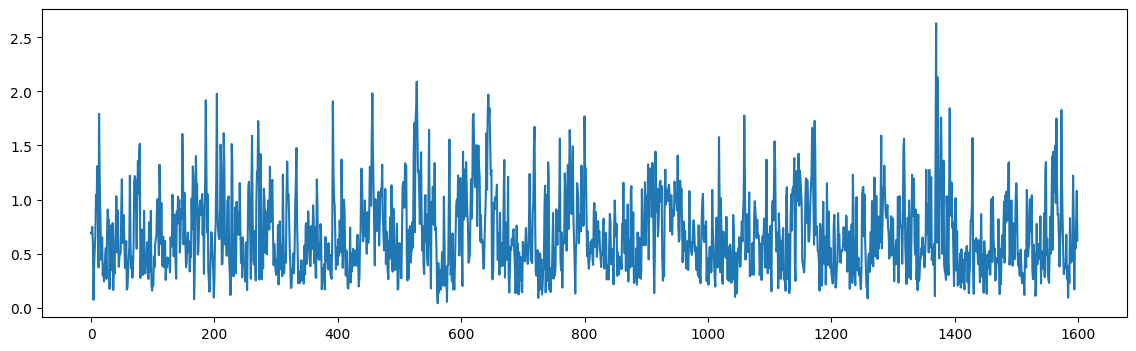

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(14, 4))
ax.plot(stc.data[0, :])

In [100]:
tmp.get_data()

array([[ 11863.53207394,  19606.16599724,   6007.93724579, ...,
        -42537.86781254,    909.5509061 , -35331.63546785],
       [ 12272.43473542,   5875.44277785,    573.07010601, ...,
        -33585.09069275,    812.39861719, -28476.45545153],
       [ 14769.37595421,   4265.92728473,   4474.47647844, ...,
        -31118.51924256, -10235.28477965, -24030.59026561],
       ...,
       [ 18777.72911891,   7844.34492954,  20989.54801784, ...,
         -1089.77703604,  11795.3100091 ,  20379.26675314],
       [ 19550.03585391,  -9455.52619188,  15866.04941488, ...,
          8220.23267339,   5472.28304481,  12767.65696115],
       [  6053.76308439, -11499.4293647 ,   9776.68740106, ...,
         -4574.19891109,   2240.7527325 ,  10819.99304586]])

In [44]:
brain = stc.plot()

Using control points [1.57144407 1.72600898 2.92068693]
